# 飽和相当温位${\theta_e ^*}$のグラフの作成
最終更新日　2020/07/22

## モジュールのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import ScalarFormatter
%matplotlib inline

## 今回用いる定数の値を代入
値はHoltonの**Appendix A**を参照

In [2]:
eps = 0.622
L = 2.5*10**6
c_p = 1004
R = 273
p_s = 100000
#p = 1*10**5

## 飽和相当温位を計算する関数を定義
|func name| quantity|
|:--:|:--:|
|function|飽和相当温位|
|function_theta|温位|
|func|飽和相当温位の指数|

$$
\begin{align}
\theta &= T\left(\frac{p_s}{p}\right)^{R/c_p}\\
\theta_e ^*&= \theta\exp\left(\frac{L_cq_s(p, T)}{c_pT}\right) \\
&= T\left(\frac{p_s}{p}\right)^{R/c_p}\exp\left(\frac{L_cq_s(p, T)}{c_pT}\right)\\
&=T\left(\frac{p_s}{p}\right)^{R/c_p}\exp\left(\frac{L_c\varepsilon e_x}{c_pTp}\right)\\
&=T\left(\frac{p_s}{p}\right)^{R/c_p}\exp\left(\frac{L_c\varepsilon 6.1078\times10^{7.5(T-273.15)/(T+237.3-273.15)}}{c_pTp}\right)
\end{align}
$$
なお、飽和混合比$q_s\simeq\varepsilon e_x/p$, 飽和水蒸気圧$e_s$の計算にはTetensの式を用いた。

In [18]:
def function(T, P):
    #return T*(p_s/P)**(R/c_p)*np.exp(eps*L*(100*6.1*10**(7.5*(T-273)/(T-273+237.3)))*10**-3/(c_p*T*P))
    return T*(p_s/P)**(R/c_p)*np.exp(eps*L*(100*6.1*10**(7.5*(T-273)/(T-273+237.3)))/(c_p*T*P))

In [15]:
def function_theta(T, P):
    return T*(p_s/P)**(R/c_p)

In [19]:
def func(T, P):
    #return eps*L*6.1*(100*10**(7.5*(T-273)/(T-273+237.3)))*10**-3/(c_p*T*P)
    return eps*L*6.1*(100*10**(7.5*(T-273)/(T-273+237.3)))/(c_p*T*P)

### まず指数部分をプロット

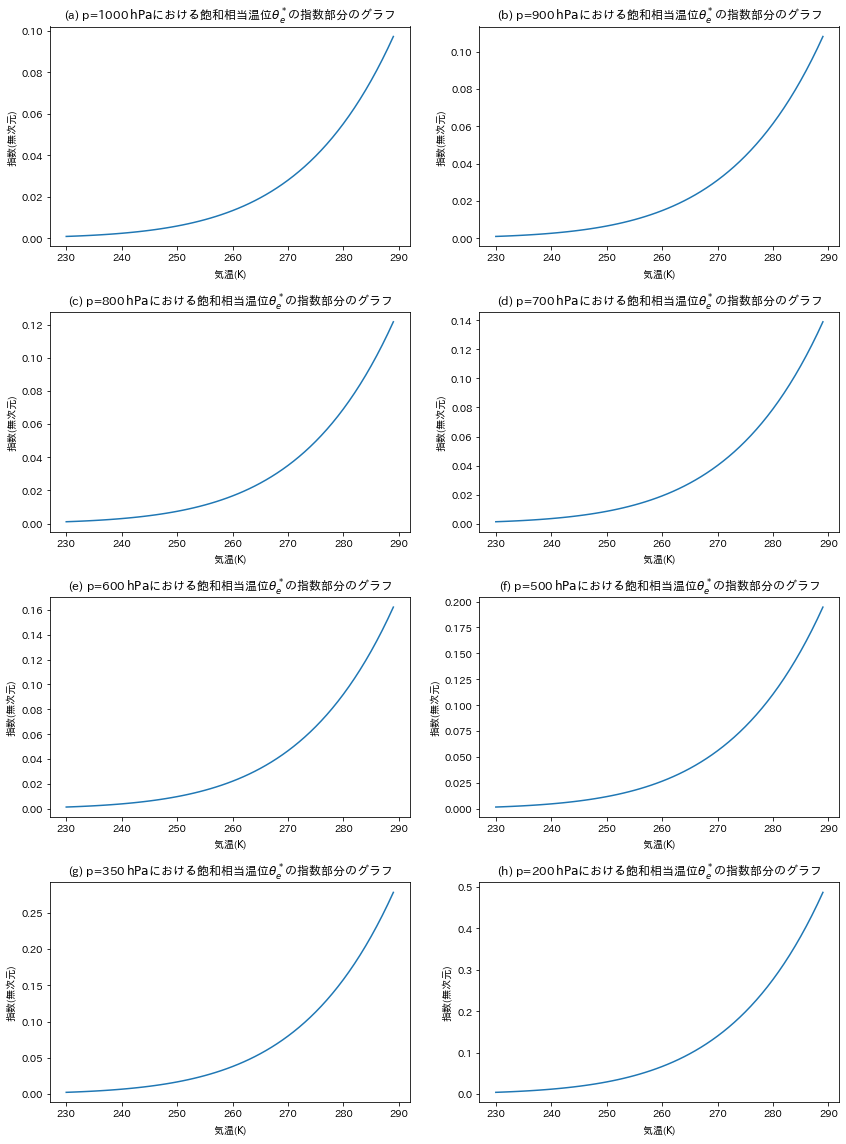

In [37]:
fig = plt.figure(figsize = (12, 16))
icount = 1
for alpha, p in zip(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], [100000, 90000, 80000, 70000, 60000, 50000, 35000, 20000]):
    list1 = []
    for t in range(230, 290):
        list1.append(func(t, p))
    ax = fig.add_subplot(4, 2, icount)
    ax.plot(list(range(230, 290)), list1)
    ax.set_title('('+alpha+') p='+str(p//100)+'$\,\mathrm{hPa}$における飽和相当温位${\\theta} _e ^*$の指数部分のグラフ')
    ax.set_xlabel('気温($\mathrm{K}$)')
    ax.set_ylabel('指数(無次元)')
    icount += 1
    
fig.tight_layout()
fig.savefig('index.png')

### 次に飽和相当温位を比較のための温位をプロット

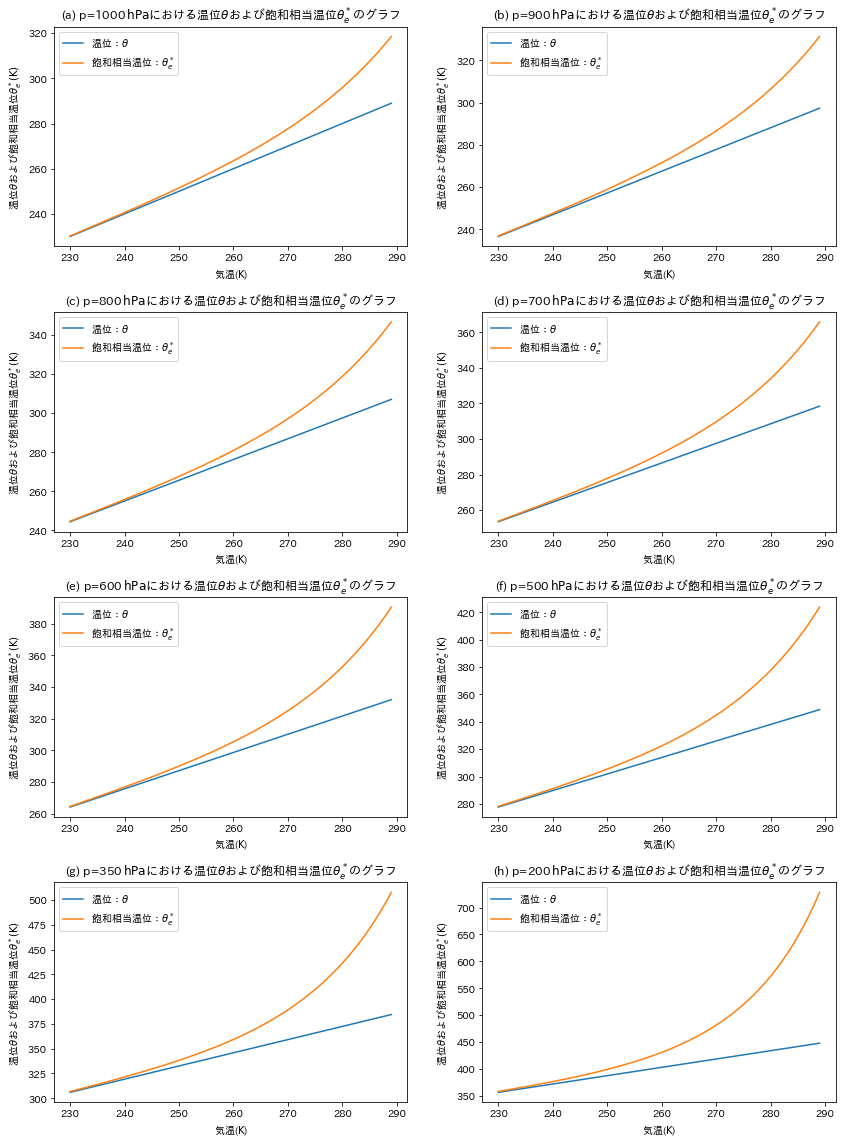

In [36]:
fig = plt.figure(figsize = (12, 16))
icount = 1
for alpha, p in zip(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], [100000, 90000, 80000, 70000, 60000, 50000, 35000, 20000]):
    list1 = []
    list2 = []
    for t in range(230, 290):
        list1.append(function(t, p))
        list2.append(function_theta(t, p))
    ax = fig.add_subplot(4, 2, icount)
    ax.plot(list(range(230, 290)), list2, label='温位：$\\theta$')
    ax.plot(list(range(230, 290)), list1, label='飽和相当温位：$\\theta_e ^*$')
    ax.set_title('('+alpha+') p='+str(p//100)+'$\,\mathrm{hPa}$における温位$\\theta$および飽和相当温位${\\theta} _e ^*$のグラフ')
    ax.set_xlabel('気温($\mathrm{K}$)')
    ax.set_ylabel('温位$\\theta$および飽和相当温位${\\theta}_e ^*(\mathrm{K})$')
    ax.legend()
    icount += 1
    
fig.tight_layout()
fig.savefig('p-const2.png')

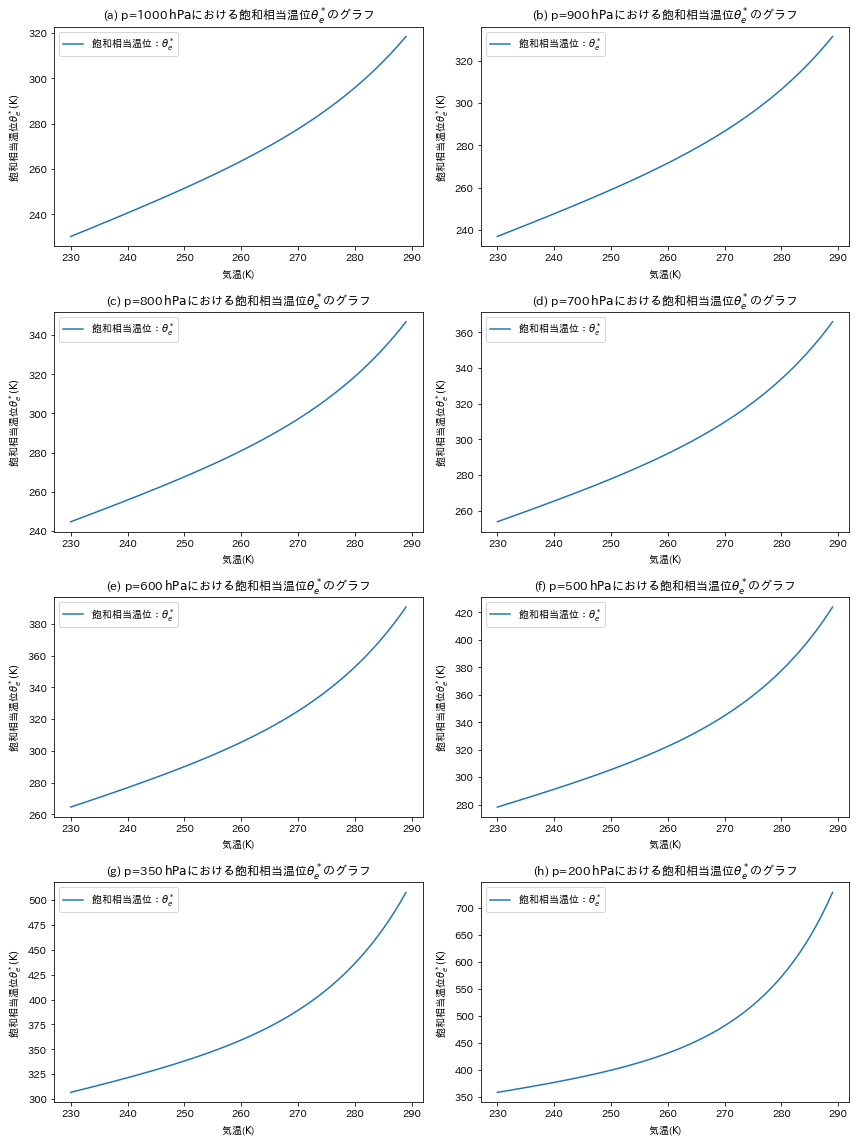

In [34]:
fig = plt.figure(figsize = (12, 16))
icount = 1
for alpha, p in zip(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], [100000, 90000, 80000, 70000, 60000, 50000, 35000, 20000]):
    list1 = []
    for t in range(230, 290):
        list1.append(function(t, p))
    ax = fig.add_subplot(4, 2, icount)
    ax.plot(list(range(230, 290)), list1, label='飽和相当温位：$\\theta_e ^*$')
    ax.set_title('('+alpha+') p='+str(p//100)+'$\,\mathrm{hPa}$における飽和相当温位${\\theta} _e ^*$のグラフ')
    ax.set_xlabel('気温($\mathrm{K}$)')
    ax.set_ylabel('飽和相当温位${\\theta}_e ^*(\mathrm{K})$')
    ax.legend()
    icount += 1
    
fig.tight_layout()
fig.savefig('p-const.png')

## 特別な意味は見出せないが、一応プロットはできるので温度一定の場合もプロット

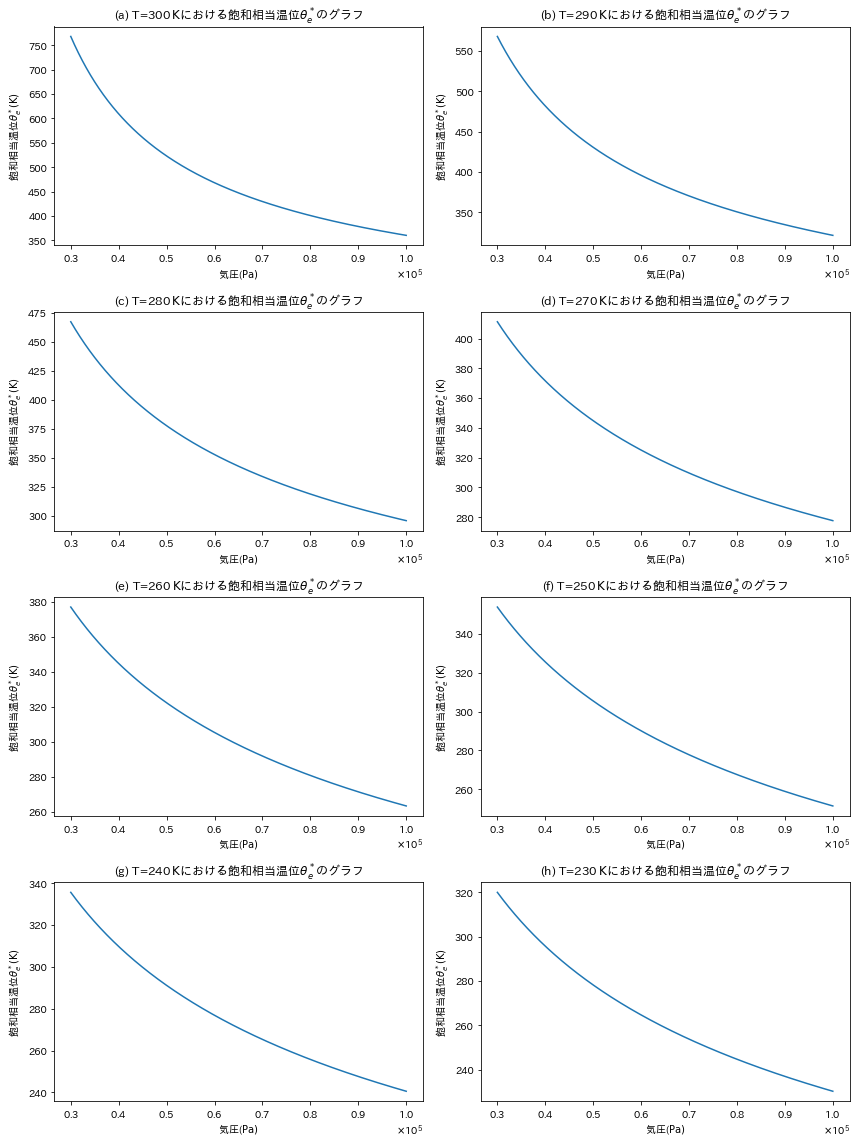

In [41]:
fig = plt.figure(figsize = (12, 16))
icount = 1
for alpha, t in zip(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], [300, 290, 280, 270, 260, 250, 240, 230]):
    list2 = []
    for p in range(30000, 100010, 10):
        list2.append(function(t, p))
    ax = fig.add_subplot(4, 2, icount)
    ax.plot(list(range(30000, 100010, 10)), list2)
    ax.set_title('('+alpha+') T='+str(t)+'$\,\mathrm{K}$における飽和相当温位${\\theta} _e ^*$のグラフ')
    ax.set_xlabel('気圧($\mathrm{Pa})$')
    ax.set_ylabel('飽和相当温位${\\theta}_e ^*(\mathrm{K})$')
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style="sci", scilimits=(0,0), axis="x")
    icount += 1
    
fig.tight_layout()
fig.savefig('t-const.png')